# Statistical Analysis on factors influencing Life Expectancy
3DC Introduction to Data Science Workshop <br/>
Dataset: Life Expectancy (WHO)<br/>
## What's covered in this notebook:
1. Data Loading
2. Data Cleaning + Exploration + Preprocessing
3. Machine Learning
4. Conclusion
Simple Linear Regression

In [49]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization
import matplotlib.pyplot as plt # data visualization


## Load datasets


In [50]:
life_expectancy_who = pd.read_csv('Life Expectancy Data.csv')
life_expectancy_who.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Data Cleaning
 

In [51]:
life_expectancy_who.info()
# Verifying whether data for each variablife_expectancy_who is according to its dataype or not.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Yes, the data looks correct w.r.t the dataypes.

In [52]:
# Checking for Null Values
life_expectancy_who.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [53]:
#Drop the first two columns for simplicity
life_expectancy = life_expectancy_who.drop(['Country', 'Year'], axis=1)

Replacing the Null Values with mean values of the data

In [54]:
# Replacing the Null Values with mean values of the data
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean',fill_value=None)
life_expectancy_who['Life expectancy ']=imputer.fit_transform(life_expectancy_who[['Life expectancy ']])
life_expectancy_who['Adult Mortality']=imputer.fit_transform(life_expectancy_who[['Adult Mortality']])
life_expectancy_who['Alcohol']=imputer.fit_transform(life_expectancy_who[['Alcohol']])
life_expectancy_who['Hepatitis B']=imputer.fit_transform(life_expectancy_who[['Hepatitis B']])
life_expectancy_who[' BMI ']=imputer.fit_transform(life_expectancy_who[[' BMI ']])
life_expectancy_who['Polio']=imputer.fit_transform(life_expectancy_who[['Polio']])
life_expectancy_who['Total expenditure']=imputer.fit_transform(life_expectancy_who[['Total expenditure']])
life_expectancy_who['Diphtheria ']=imputer.fit_transform(life_expectancy_who[['Diphtheria ']])
life_expectancy_who['GDP']=imputer.fit_transform(life_expectancy_who[['GDP']])
life_expectancy_who['Population']=imputer.fit_transform(life_expectancy_who[['Population']])
life_expectancy_who[' thinness  1-19 years']=imputer.fit_transform(life_expectancy_who[[' thinness  1-19 years']])
life_expectancy_who[' thinness 5-9 years']=imputer.fit_transform(life_expectancy_who[[' thinness 5-9 years']])
life_expectancy_who['Income composition of resources']=imputer.fit_transform(life_expectancy_who[['Income composition of resources']])
life_expectancy_who['Schooling']=imputer.fit_transform(life_expectancy_who[['Schooling']])

life_expectancy_who.isnull().sum() # check null values again

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [55]:
# Renaming some column names as they contain trailing spaces.
life_expectancy_who.rename(columns={" BMI ":"BMI","Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"thinness_1to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Tot_Exp"},inplace=True)

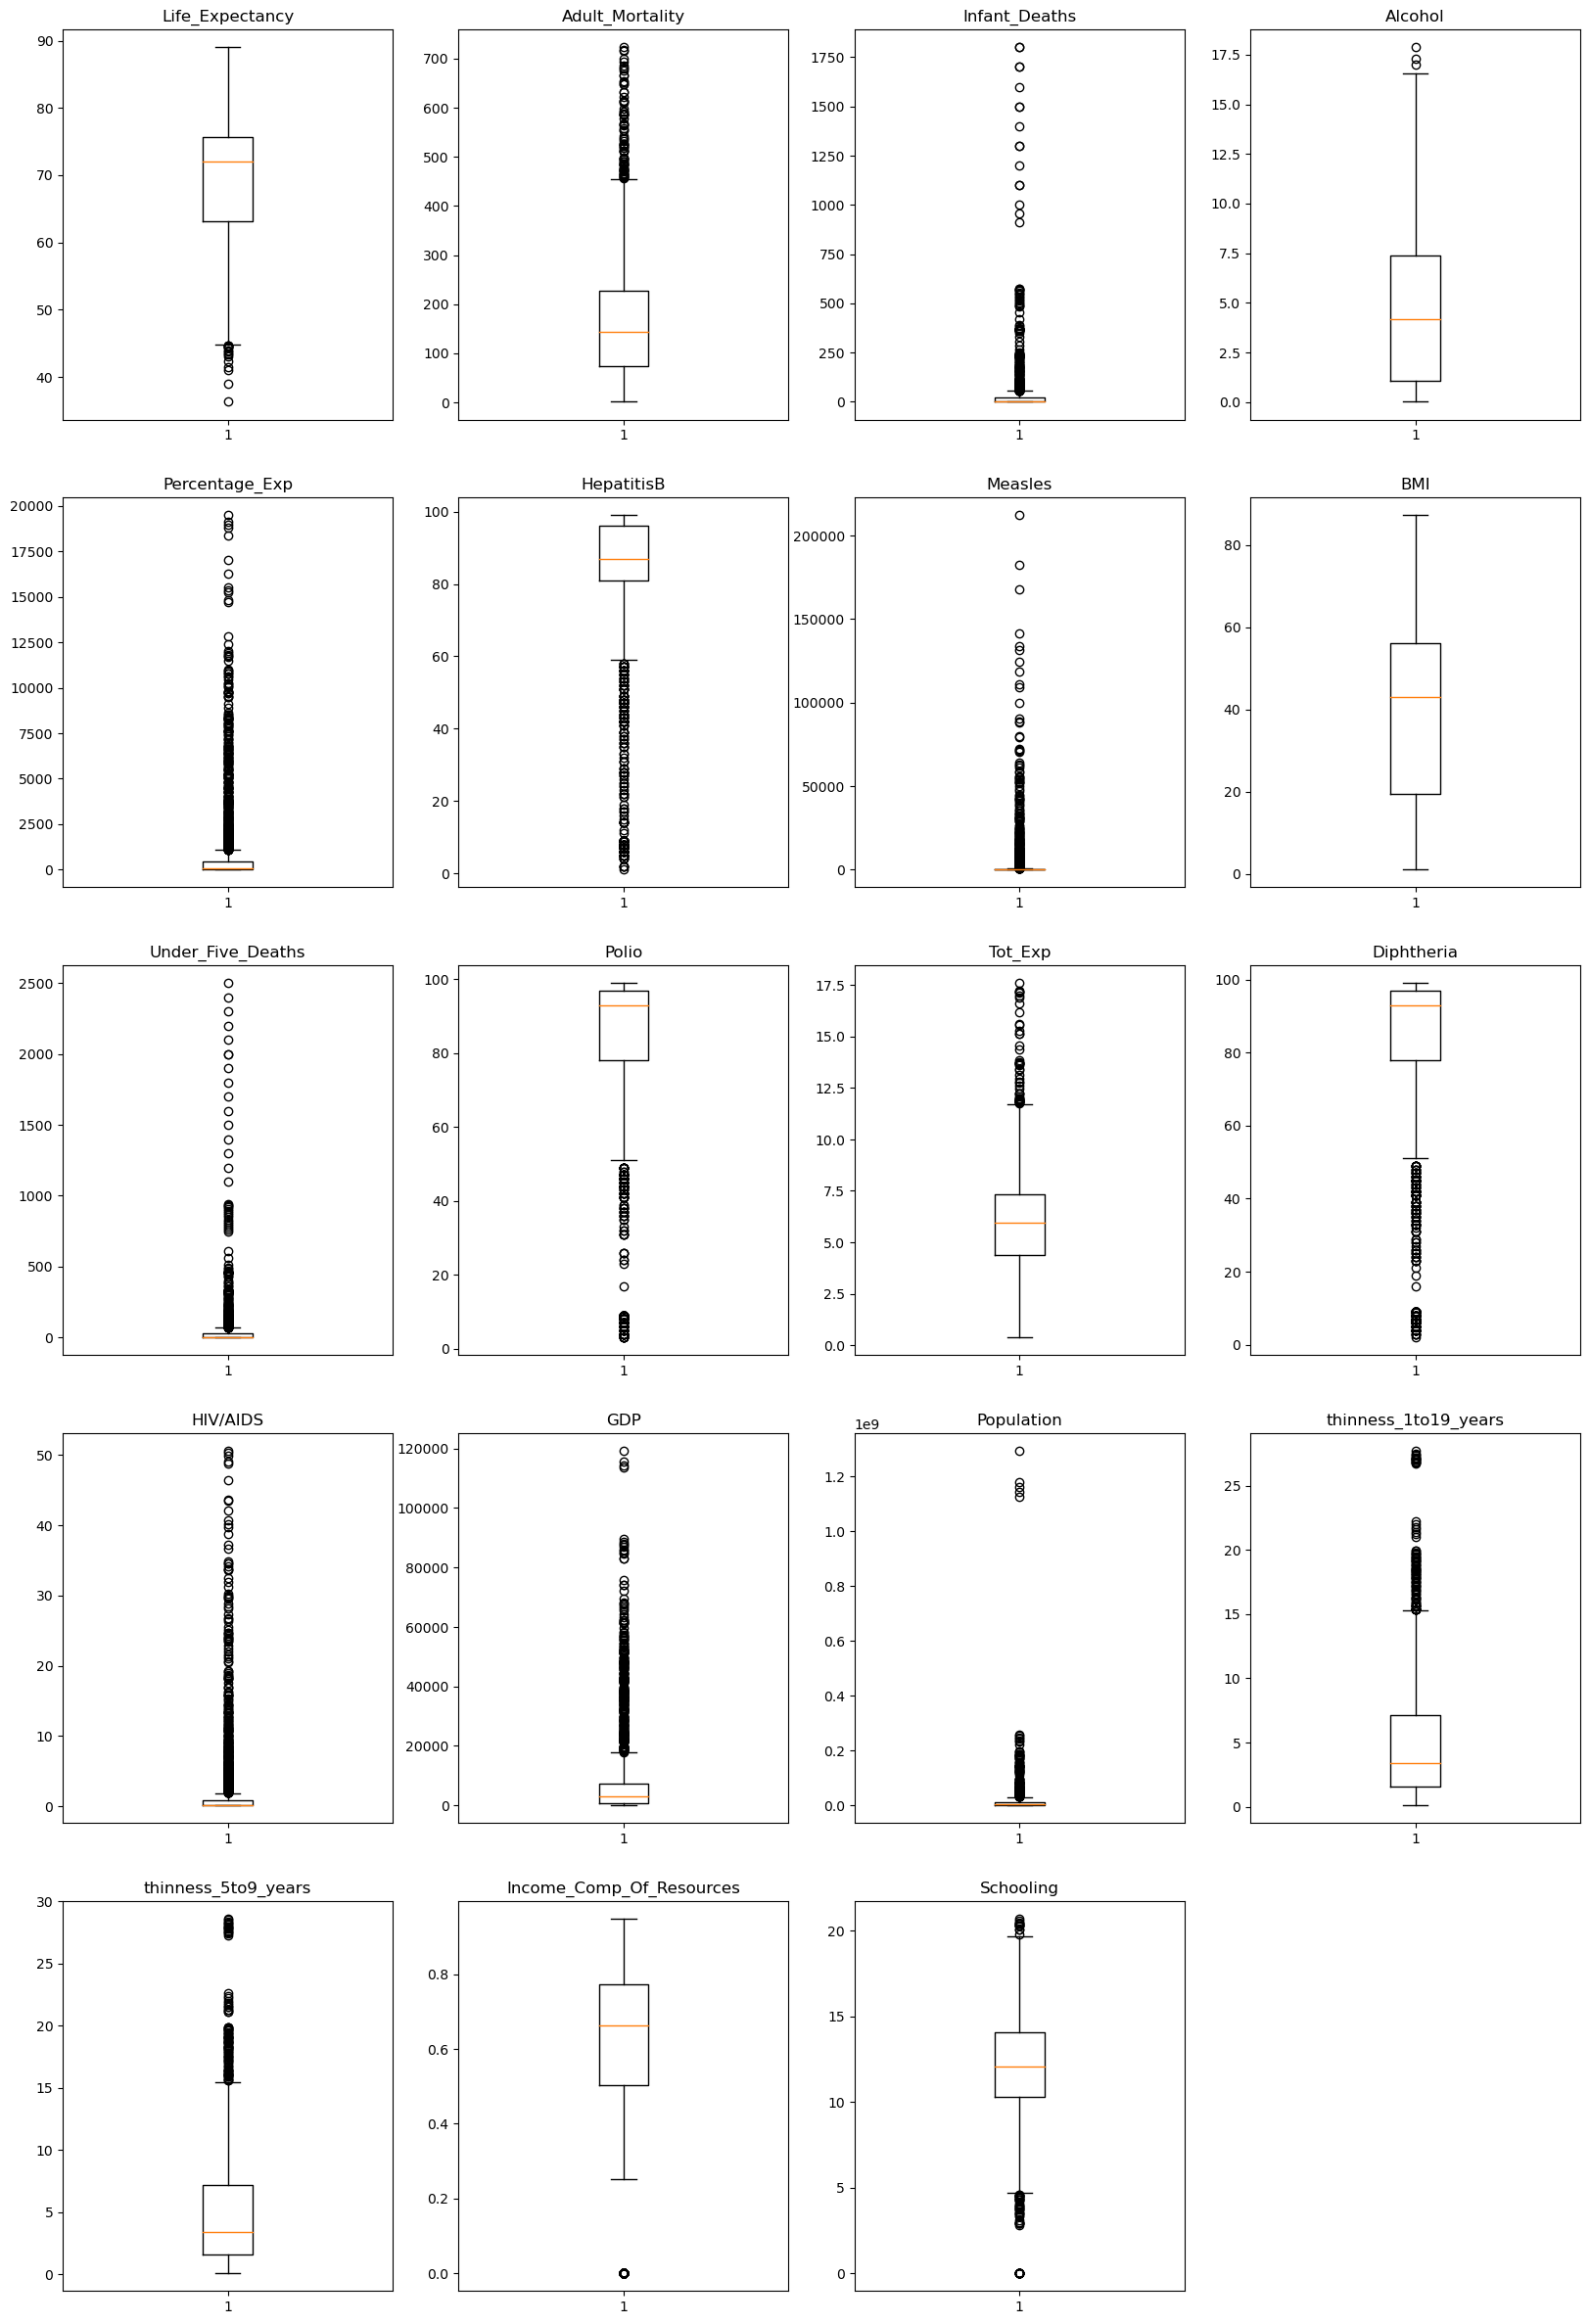

In [56]:
# Create a dictionary of columns.
col_dict = {'Life_Expectancy':1,'Adult_Mortality':2,'Infant_Deaths':3,'Alcohol':4,'Percentage_Exp':5,'HepatitisB':6,'Measles':7,'BMI':8,'Under_Five_Deaths':9,'Polio':10,'Tot_Exp':11,'Diphtheria':12,'HIV/AIDS':13,'GDP':14,'Population':15,'thinness_1to19_years':16,'thinness_5to9_years':17,'Income_Comp_Of_Resources':18,'Schooling':19}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(life_expectancy_who[variable],whis=1.5)
                     plt.title(variable)

plt.show()

In [57]:
# Calculate number of outliers and its percentage in each variable using Tukey's method.

for variable in col_dict.keys():
    q75, q25 = np.percentile(life_expectancy_who[variable], [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Percentage of outliers in {} : {}".format(variable,len((np.where((life_expectancy_who[variable] > max_val) | 
                                                                                           (life_expectancy_who[variable] < min_val))[0]))*100/1987))

Percentage of outliers in Life_Expectancy : 0.8555611474584801
Percentage of outliers in Adult_Mortality : 4.3281328636134875
Percentage of outliers in Infant_Deaths : 15.853044791142425
Percentage of outliers in Alcohol : 0.1509813789632612
Percentage of outliers in Percentage_Exp : 19.577252138902868
Percentage of outliers in HepatitisB : 15.903371917463513
Percentage of outliers in Measles : 27.27730246602919
Percentage of outliers in BMI : 0.0
Percentage of outliers in Under_Five_Deaths : 19.828887770508302
Percentage of outliers in Polio : 14.041268243583291
Percentage of outliers in Tot_Exp : 2.5666834423754405
Percentage of outliers in Diphtheria : 14.997483643683946
Percentage of outliers in HIV/AIDS : 27.27730246602919
Percentage of outliers in GDP : 15.09813789632612
Percentage of outliers in Population : 9.76346250629089
Percentage of outliers in thinness_1to19_years : 5.032712632108707
Percentage of outliers in thinness_5to9_years : 4.98238550578762
Percentage of outliers i

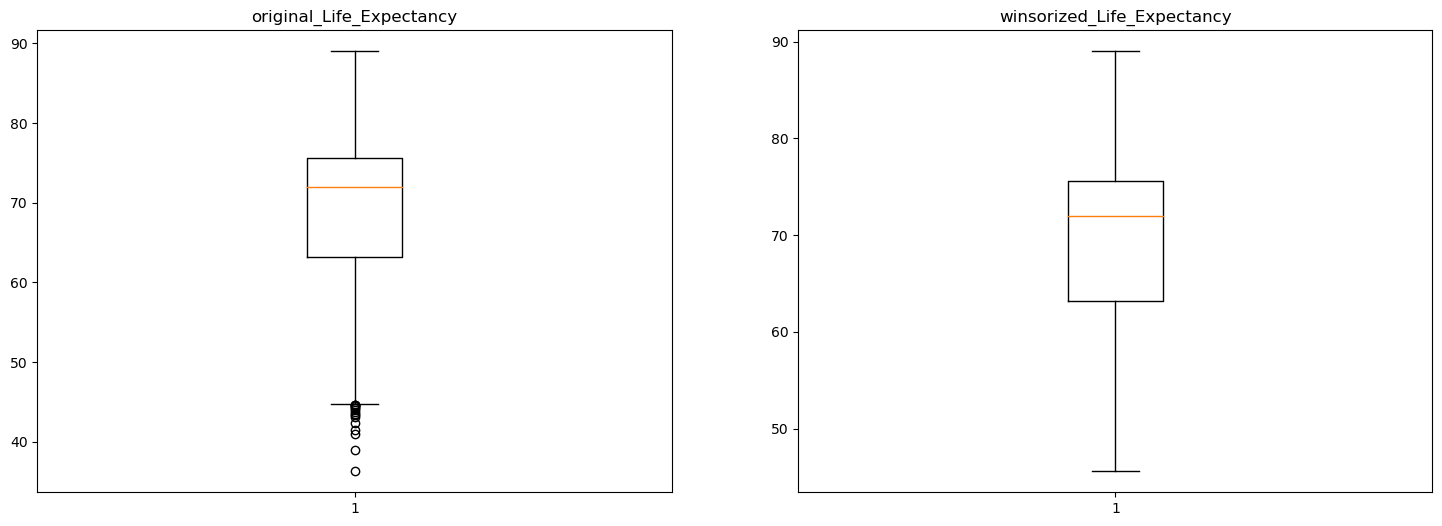

In [58]:
# Removing Outliers in the variables using Winsorization technique. 
# Winsorization involves transforming the data such that all extreme values beyond a certain threshold are replaced by the closest value that is within the threshold.
# Winsorize Life_Expectancy
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Life_Expectancy = life_expectancy_who['Life_Expectancy']
plt.boxplot(original_Life_Expectancy)
plt.title("original_Life_Expectancy")

plt.subplot(1,2,2)
winsorized_Life_Expectancy = winsorize(life_expectancy_who['Life_Expectancy'],(0.01,0))
plt.boxplot(winsorized_Life_Expectancy)
plt.title("winsorized_Life_Expectancy")

plt.show()

this is good


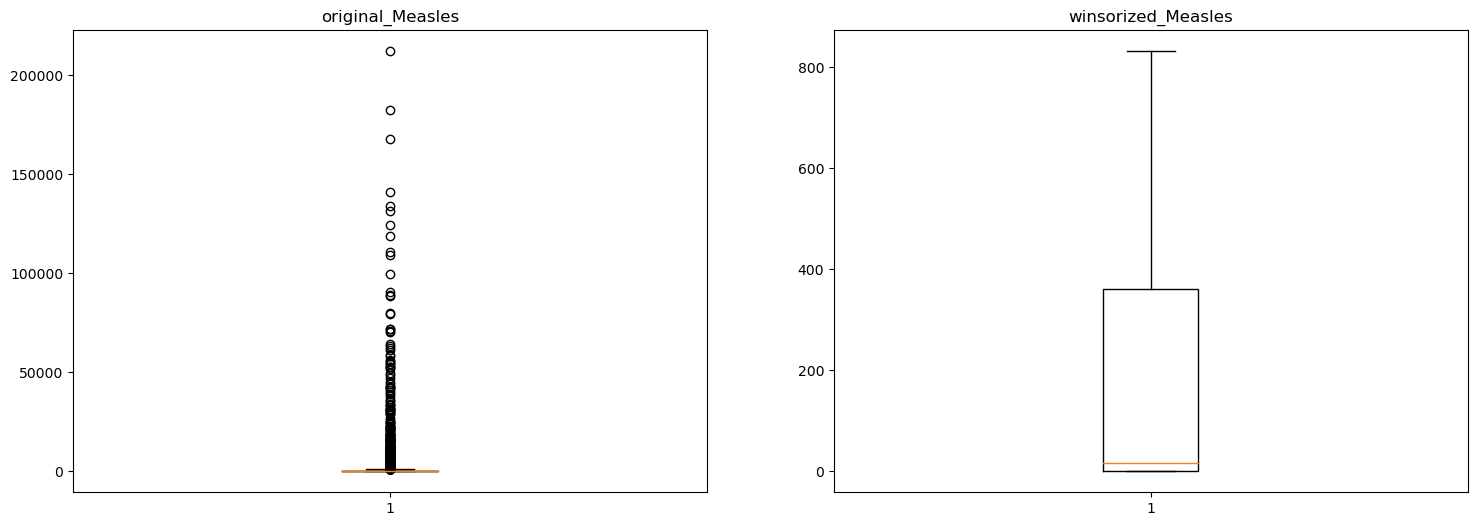

In [59]:
# Winsorize Measles
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Measles = life_expectancy_who['Measles']
plt.boxplot(original_Measles)
plt.title("original_Measles")

plt.subplot(1,2,2)
winsorized_Measles = winsorize(life_expectancy_who['Measles'],(0,0.19))
plt.boxplot(winsorized_Measles)
plt.title("winsorized_Measles")

plt.show()
life_expectancy_who = life_expectancy_who.drop('Measles',axis=1)

Winsorization changes 19% of the data, which may not give better results. Hence drop this column.

Winsorise the rest


In [60]:
winsorized_Adult_Mortality = winsorize(life_expectancy_who['Adult_Mortality'],(0,0.03))
winsorized_Infant_Deaths = winsorize(life_expectancy_who['Infant_Deaths'],(0,0.10))
winsorized_Alcohol = winsorize(life_expectancy_who['Alcohol'],(0,0.01))
winsorized_Percentage_Exp = winsorize(life_expectancy_who['Percentage_Exp'],(0,0.12))
winsorized_HepatitisB = winsorize(life_expectancy_who['HepatitisB'],(0.11,0))
winsorized_Under_Five_Deaths = winsorize(life_expectancy_who['Under_Five_Deaths'],(0,0.12))
winsorized_Polio = winsorize(life_expectancy_who['Polio'],(0.09,0))
winsorized_Tot_Exp = winsorize(life_expectancy_who['Tot_Exp'],(0,0.01))
winsorized_Diphtheria = winsorize(life_expectancy_who['Diphtheria'],(0.10,0))
winsorized_HIV = winsorize(life_expectancy_who['HIV/AIDS'],(0,0.16))
winsorized_GDP = winsorize(life_expectancy_who['GDP'],(0,0.13))
winsorized_thinness_1to19_years = winsorize(life_expectancy_who['thinness_1to19_years'],(0,0.04))
winsorized_thinness_5to9_years = winsorize(life_expectancy_who['thinness_5to9_years'],(0,0.04))
winsorized_Income_Comp_Of_Resources = winsorize(life_expectancy_who['Income_Comp_Of_Resources'],(0.05,0))
winsorized_Schooling = winsorize(life_expectancy_who['Schooling'],(0.02,0.01))
winsorized_Population = winsorize(life_expectancy_who['Population'],(0,0.14))


In [70]:
# Adding winsorized variables to the data frame.
life_expectancy_who['winsorized_Life_Expectancy'] = winsorized_Life_Expectancy
life_expectancy_who['winsorized_Adult_Mortality'] = winsorized_Adult_Mortality
life_expectancy_who['winsorized_Infant_Deaths'] = winsorized_Infant_Deaths
life_expectancy_who['winsorized_Alcohol'] = winsorized_Alcohol
life_expectancy_who['winsorized_Percentage_Exp'] = winsorized_Percentage_Exp
life_expectancy_who['winsorized_HepatitisB'] = winsorized_HepatitisB
life_expectancy_who['winsorized_Under_Five_Deaths'] = winsorized_Under_Five_Deaths
life_expectancy_who['winsorized_Polio'] = winsorized_Polio
life_expectancy_who['winsorized_Tot_Exp'] = winsorized_Tot_Exp
life_expectancy_who['winsorized_Diphtheria'] = winsorized_Diphtheria
life_expectancy_who['winsorized_HIV'] = winsorized_HIV
life_expectancy_who['winsorized_GDP'] = winsorized_GDP
life_expectancy_who['winsorized_Population'] = winsorized_Population
life_expectancy_who['winsorized_thinness_1to19_years'] = winsorized_thinness_1to19_years
life_expectancy_who['winsorized_thinness_5to9_years'] = winsorized_thinness_5to9_years
life_expectancy_who['winsorized_Income_Comp_Of_Resources'] = winsorized_Income_Comp_Of_Resources
life_expectancy_who ['winsorized_Schooling'] = winsorized_Schooling
    

# Relationship Visualisation and analysis

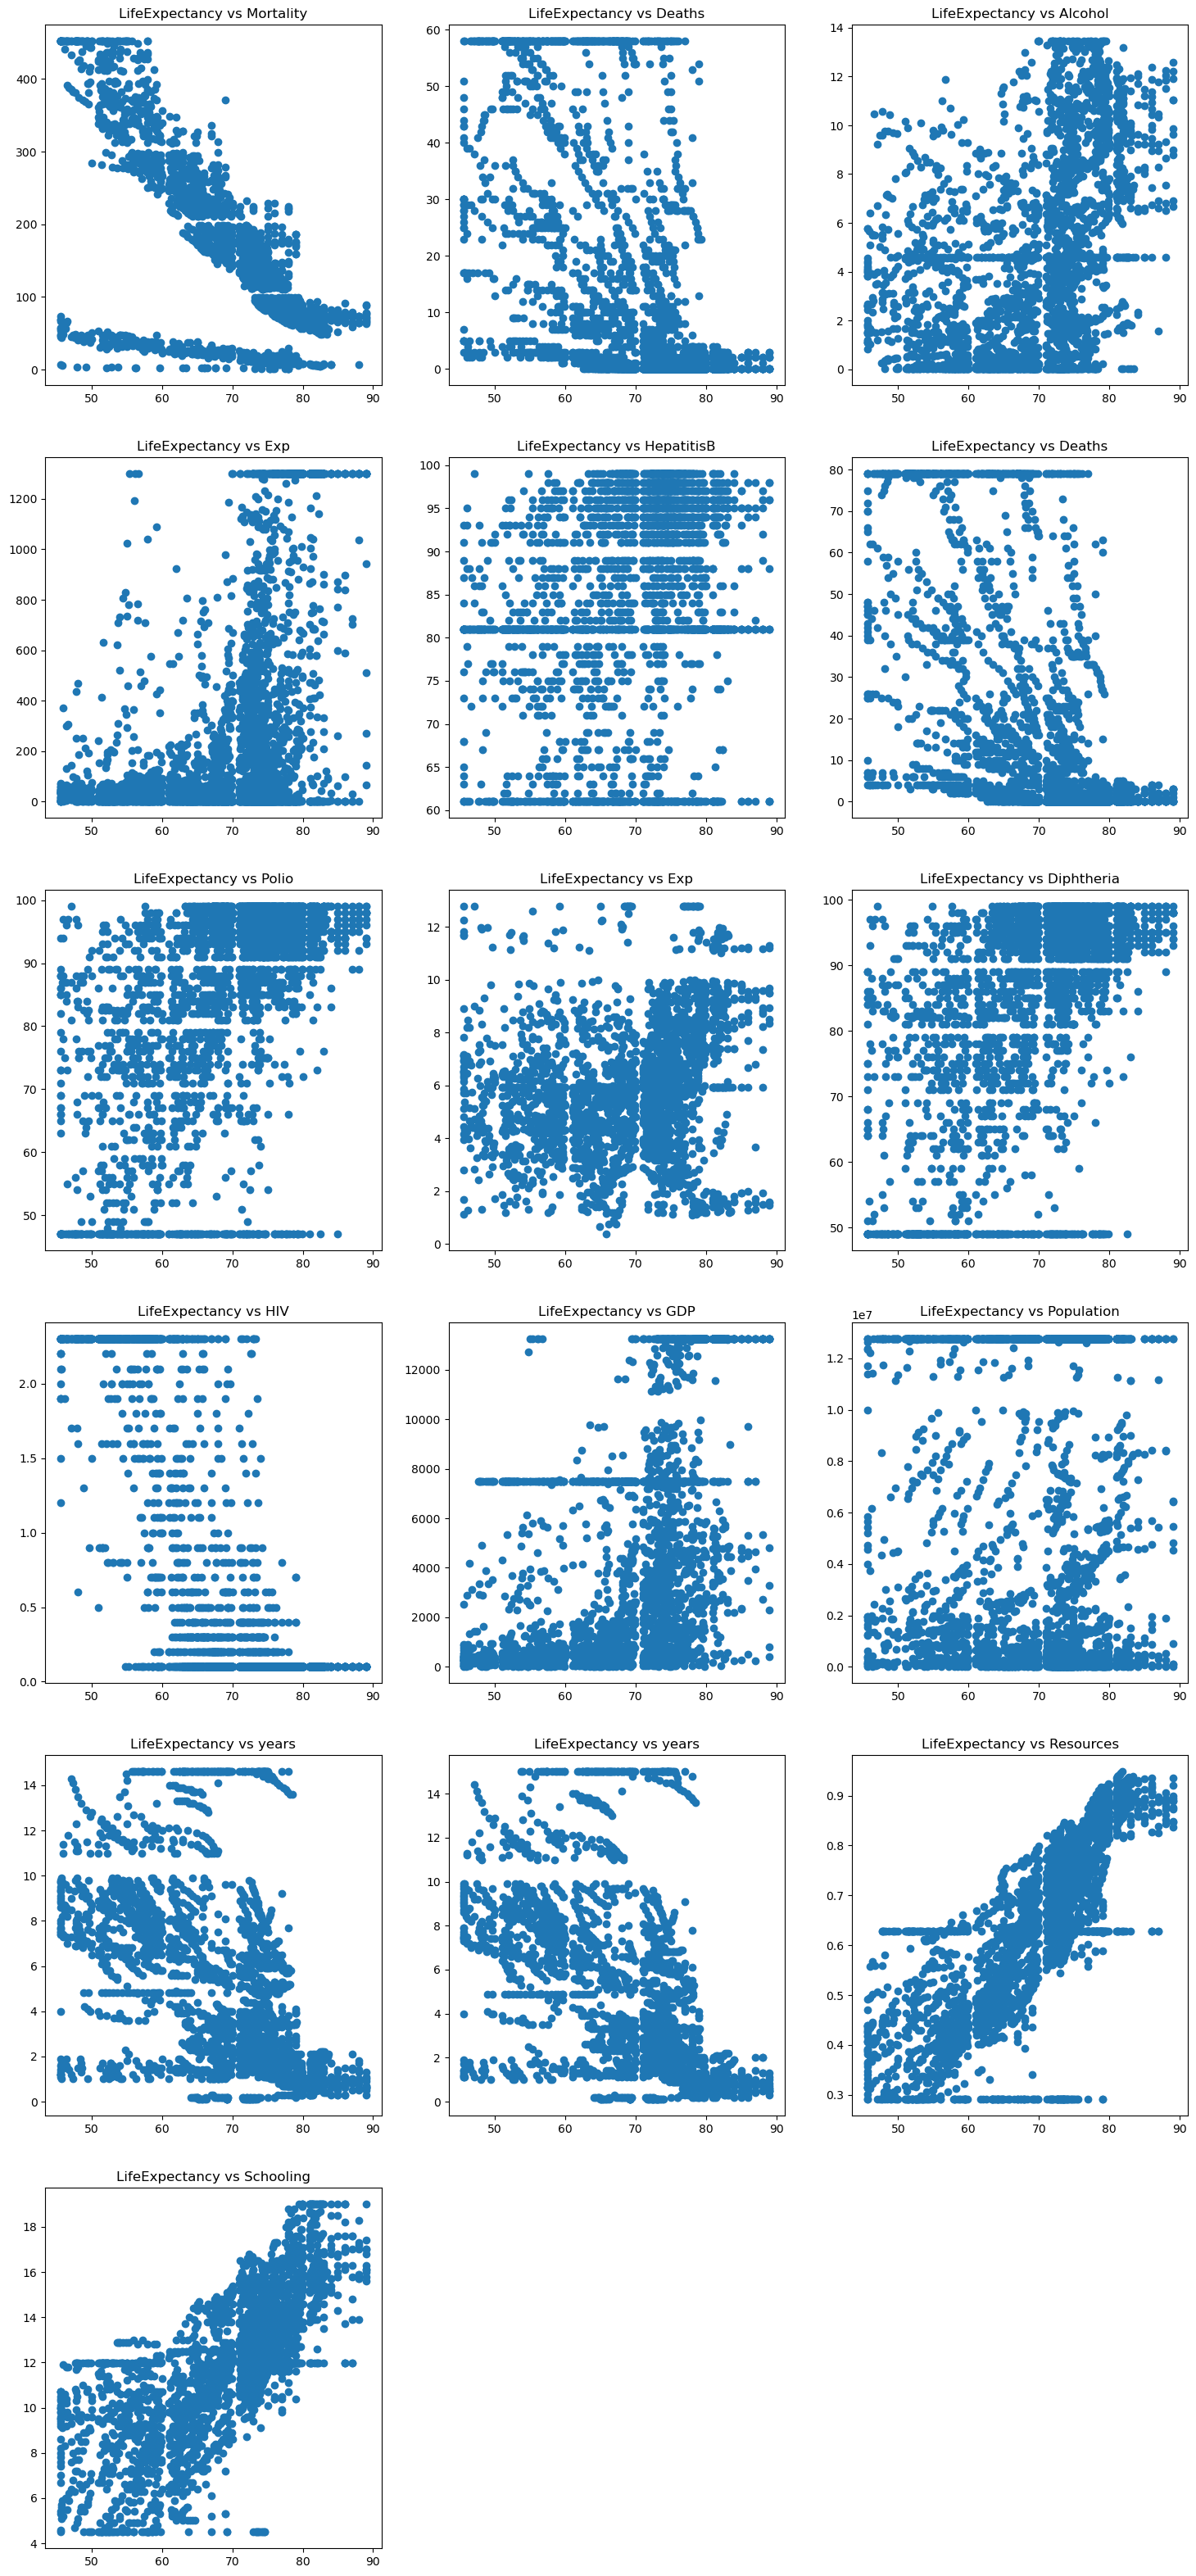

In [73]:
# List of variable names to plot against winsorized_Life_Expectancy
variables = [
    "winsorized_Adult_Mortality", "winsorized_Infant_Deaths", "winsorized_Alcohol",
    "winsorized_Percentage_Exp", "winsorized_HepatitisB", "winsorized_Under_Five_Deaths",
    "winsorized_Polio", "winsorized_Tot_Exp", "winsorized_Diphtheria",
    "winsorized_HIV", "winsorized_GDP", "winsorized_Population",
    "winsorized_thinness_1to19_years", "winsorized_thinness_5to9_years",
    "winsorized_Income_Comp_Of_Resources", "winsorized_Schooling"
] # this is abit stupid to do but i got lazy so i gpted. if u are a freshie dont do this, not a good practice

plt.figure(figsize=(18, 40))

# Loop through variables and create subplots
for i, var in enumerate(variables, start=1):
    plt.subplot(6, 3, i)
    plt.scatter(life_expectancy_who["winsorized_Life_Expectancy"], life_expectancy_who[var])
    plt.title(f"LifeExpectancy vs {var.split('_')[-1]}")  # Simplified title

plt.show()

Observation:
1. Life_Expectancy has somewhat Negative relationship with AdultMortality.
2. Life_Expectancy has positive relationship with Income_Comp_Of_Resources and Schooling.<br/>

Let us observe if there exists any correlation among the variables that are related to the target variable(winsorized_Life_Expectancy).

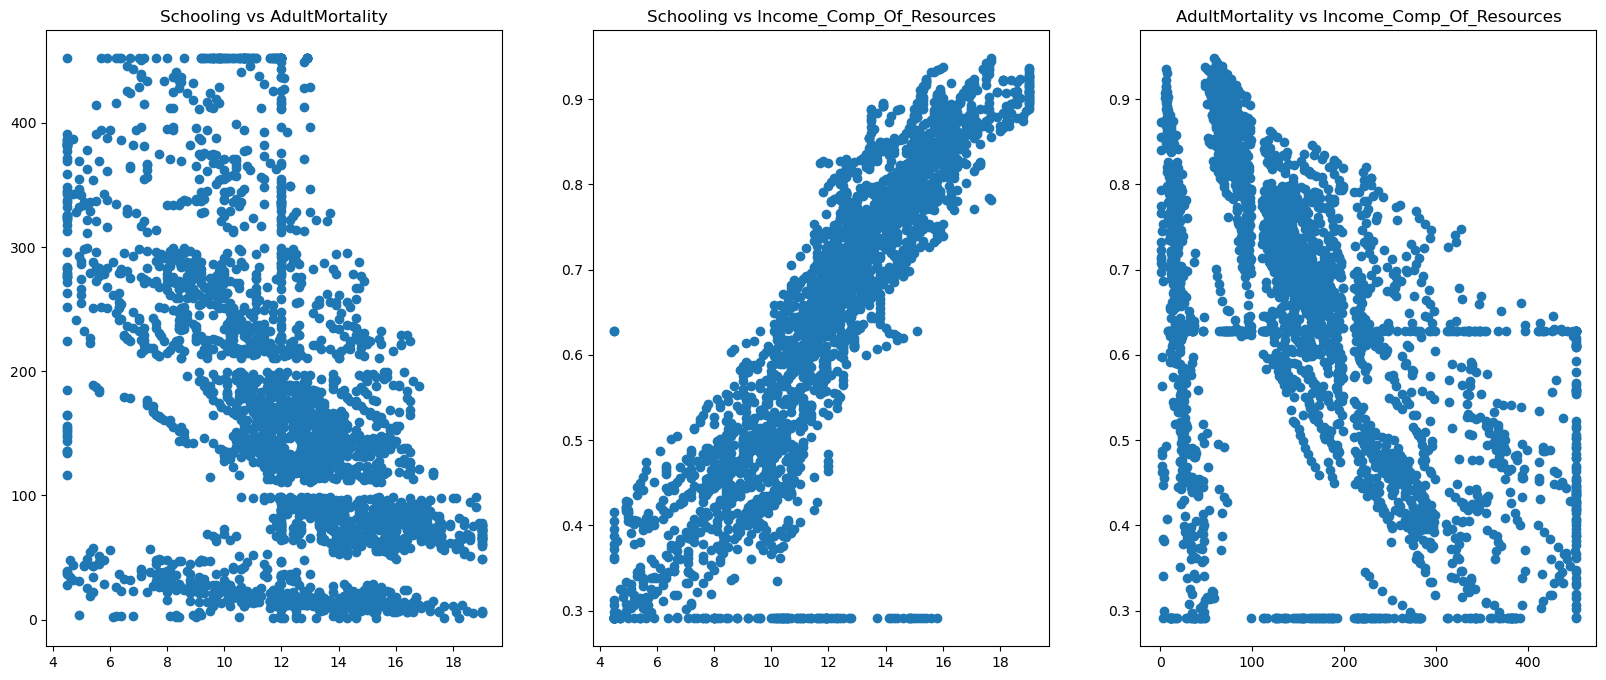

In [75]:
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
plt.scatter(life_expectancy_who["winsorized_Schooling"], life_expectancy_who["winsorized_Adult_Mortality"])
plt.title("Schooling vs AdultMortality")

plt.subplot(1,3,2)
plt.scatter(life_expectancy_who["winsorized_Schooling"], life_expectancy_who["winsorized_Income_Comp_Of_Resources"])
plt.title("Schooling vs Income_Comp_Of_Resources")

plt.subplot(1,3,3)
plt.scatter(life_expectancy_who["winsorized_Adult_Mortality"], life_expectancy_who["winsorized_Income_Comp_Of_Resources"])
plt.title("AdultMortality vs Income_Comp_Of_Resources")

plt.show()

Looks like all these variables have inter-relation. Let us confirm this using correlation heatmap

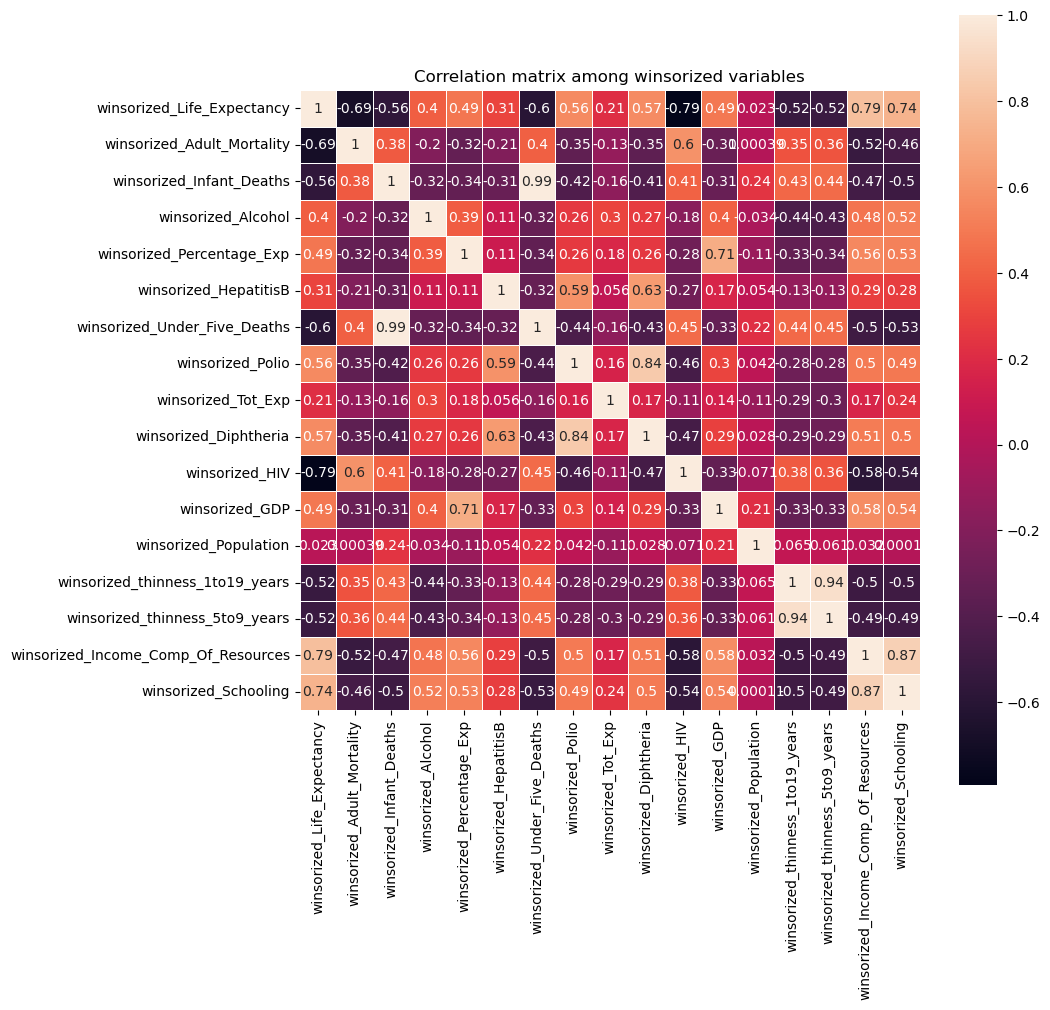

In [78]:
import seaborn as sns

# Correlation of winsorized variables
le_win = life_expectancy_who.iloc[:,21:]
le_win['Country'] = life_expectancy_who['Country']
le_win['Year'] = life_expectancy_who['Year']
le_win['Status'] = life_expectancy_who['Status']
le_win_num = le_win.iloc[:,:-3]
cormat = le_win_num.corr()

plt.figure(figsize=(10,10))
sns.heatmap(cormat, square=True, annot=True, linewidths=.5)
plt.title("Correlation matrix among winsorized variables")
plt.show()

Observations:

winsorized_Income_Comp_Of_Resources is correlated with winsorized_Schooling.<br/>
winsorized_thinness_1to19_years and winsorized_thinness_5to9_years are correlated.<br/>
winsorized_Polio and winsorized_Diphtheria are correlated.<br/>
winsorized_Percentage_Exp and winsorized_GDP are correlated.<br/>
winsorized_Income_Comp_Of_Resources and winsorized_Life_Expectancy are correlated.<br/>
winsorized_Life_Expectancy and winsorized_Schooling are correlated.<br/>
winsorized_Infant_Deaths and winsorized_Under_Five_Deaths are correlated.<br/>
winsorized_HIV has negative relation with winsorized_Life_Expectancy.<br/>
winsorized_Adult_Mortality has negative relation with winsorized_Life_Expectancy.

## Least-squares estimation of the parameters (Learn and Optimise)

Linear regression 


In [64]:
def S_xx(life_expectancy_who, x):
    """Calculates the sum of squared deviations of x from its mean."""
    x_values = life_expectancy_who[x]
    x_mean = x_values.mean()
    return ((x_values - x_mean) ** 2).sum()

def S_xy(life_expectancy_who, x, y):
    """Calculates the sum of cross-products of deviations from the means of x and y."""
    x_values = life_expectancy_who[x]
    y_values = life_expectancy_who[y]
    x_mean = x_values.mean()
    return ((x_values - x_mean) * y_values).sum()

In [65]:
print(f"S_xx = {S_xx(life_expectancy, 'Schooling')}")
print(f"S_xy = {S_xy(life_expectancy, 'Schooling', 'Life expectancy ')}")

S_xx = 31297.21585585586
S_xy = 66493.2126126126


In [66]:
def simple_linear_regression(life_expectancy_who, x, y):
    beta_1 = S_xy(life_expectancy_who, x, y)/S_xx(life_expectancy_who, x)

    y_bar = life_expectancy_who[y].mean()
    x_bar = life_expectancy_who[x].mean()
    beta_0 = y_bar - beta_1 * x_bar
    return beta_0, beta_1

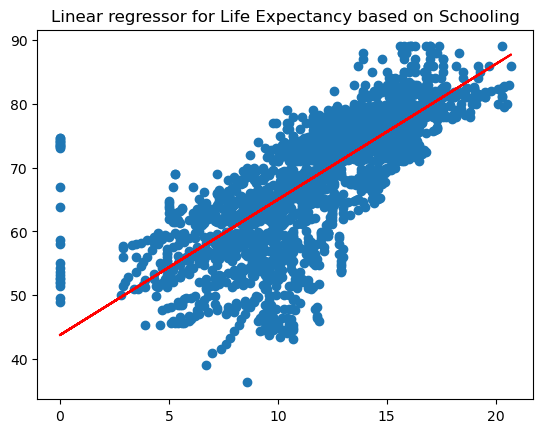

In [67]:
beta_0, beta_1 = simple_linear_regression(life_expectancy, 'Schooling', 'Life expectancy ')
y_true = life_expectancy['Life expectancy ']
x = life_expectancy['Schooling']
y_predicted = (x * beta_1) + beta_0

plt.scatter(x, y_true)
plt.plot(x, y_predicted, 'r')
plt.title('Linear regressor for Life Expectancy based on Schooling')
plt.savefig('Linear regressor for Life Expectancy based on Schooling.png')
plt.show()

In [68]:
def SS_T(life_expectancy_who, y):
    result = 0
    y_bar = life_expectancy_who[y].mean()
    for i in range(len(life_expectancy_who)):
        result = result + (life_expectancy_who[y][i] - y_bar) ** 2
    return result

def estimated_sigma_squared(life_expectancy_who, x, y):
    beta_0, beta_1 = simple_linear_regression(life_expectancy_who, x, y)
    
    return (SS_T(life_expectancy_who, y) - beta_1 * S_xy(life_expectancy_who, x, y))/(len(life_expectancy_who) - 2)

## Reference

Introduction to Linear Regression Analysis - Doughlas C.Montgomery, Elizabeth A.Peck, G.Geoffrey Vining, Chapter 1: Simple Linear Regression Model